1. Cases per Hospital
2. Types of Hospital
3. How many hospitals fall in each cities
4. How many cases did each hospitals conduct over cities
5. How often did the patient visit hospital?
6. Do the patient prefer same hospital everytime?
7. Which is the most visited department
8. Spread of Admissions
9. Do older people stay longer ?
10. Which age people pays more?
11. Is initial admission deposit related to their stay?
12. How much is deposit related to age and stay
13. How long patient stay based on severity
14. Are Age & Stay Days related to Severeness
15. Is bed alloted based on severeness
16. Are there more visitors for patients with severe illness
17. Do hospitals provide extra rooms for long stay
18. How many hospital types fall in each region

In [1]:
import numpy as np 
import pandas as pd
import altair as alt
from vega_datasets import data
import matplotlib.pyplot as pl
import seaborn as sns

In [2]:
hosp=pd.read_csv('train_data.csv')
hosp.sample(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
11474,11475,29,a,4,X,3,gynecology,R,F,3.0,2664,8.0,Emergency,Moderate,8,61-70,5614.0,51-60
115921,115922,2,c,5,Z,2,gynecology,S,F,2.0,32785,4.0,Trauma,Extreme,2,21-30,5055.0,21-30
204257,204258,9,d,5,Z,2,gynecology,S,F,2.0,41700,8.0,Trauma,Extreme,4,0-10,4433.0,31-40
242749,242750,25,e,1,X,4,gynecology,Q,E,1.0,51553,4.0,Trauma,Extreme,2,31-40,3930.0,11-20
66311,66312,23,a,6,X,2,gynecology,S,F,1.0,104206,7.0,Emergency,Extreme,4,21-30,5349.0,71-80


In [3]:
print('Number of unique hospitals: ',hosp['Hospital_code'].nunique())
print('Number of cases present in the dataset: ',len(hosp))
print('Number of unique patients present in the dataset: ',hosp['patientid'].nunique())

Number of unique hospitals:  32
Number of cases present in the dataset:  318438
Number of unique patients present in the dataset:  92017


In [4]:
hosp_visits=hosp['Hospital_code'].value_counts().to_frame().reset_index().rename(columns={'index':'Hospital_code','Hospital_code':'Total'})
hosp_visits.tail(10)

,Hospital_code,Total
22,2,5102
23,30,5002
24,22,4277
25,31,3967
26,16,3671
27,8,3663
28,18,3630
29,20,1405
30,7,1306
31,4,1240


In [5]:
base=alt.Chart(hosp_visits)
bar=base.mark_bar(color='royalblue').encode(
x=alt.X('Total',bin=alt.Bin(step=2500)),
    y='count()',
    tooltip=[alt.Tooltip('count():Q')]
).properties(
    width=500,
    height=300,
    title='Cases observed in each Hospital with Global  Mean'
)
mean_bar=base.mark_rule(color='red').encode(
    x='mean(Total)',
    size=alt.value(5),
    tooltip=[alt.Tooltip('mean(Total):Q')]
    
)
bar+mean_bar

alt.LayerChart(...)

In [6]:
print(len(hosp_visits),'Hospitals dealt with ',np.sum(hosp_visits,axis=0)[1],' cases')

32 Hospitals dealt with  318438  cases


In [7]:
print('Average Cases per Hospital',round(np.mean(hosp_visits['Total'])))

Average Cases per Hospital 9951


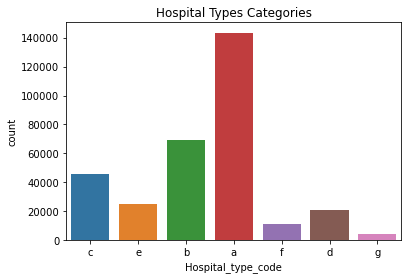

In [8]:
sns.countplot(hosp['Hospital_type_code'])
pl.title("Hospital Types Categories")
pl.show()

In [9]:
hosp_type=hosp['Hospital_type_code'].value_counts().to_frame().reset_index().rename(columns={'Hospital_code':'Type','Hospital_type_code':'Count'})
hosp_type.tail(10)

,index,Count
0,a,143425
1,b,68946
2,c,45928
3,e,24770
4,d,20389
5,f,10703
6,g,4277


In [10]:
root=alt.Chart(hosp_type)
bar=root.mark_bar(color='purple').encode(
    x='index',
    y='Count'
).properties(
    width=500,
    height=300,
    title='Hospital Types and its Counts'
    )
text=bar.mark_text(
    align='center',
    baseline='middle',
    dy=-10,
    size=15,
    color='black'
    
).encode(text='Count')
bar+text

alt.LayerChart(...)

In [11]:
city_hosp=hosp[['Hospital_code','City_Code_Hospital']].drop_duplicates().groupby('City_Code_Hospital').size().to_frame().reset_index().rename(columns={0:'count'})
city_hosp['City_Code_Hospital']=['City {}'.format(i) for i in city_hosp['City_Code_Hospital']]
city_hosp

,City_Code_Hospital,count
0,City 1,6
1,City 2,3
2,City 3,6
3,City 4,3
4,City 5,4
5,City 6,2
6,City 7,2
7,City 9,3
8,City 10,1
9,City 11,1


In [12]:
bars=alt.Chart(city_hosp).mark_bar(color='purple').encode(
x='count',
y=alt.Y('City_Code_Hospital',sort='-x')
).properties(
height=350,
width=500,
title='Hospitals in each cities')
text=bars.mark_text(
size=15,
dx=10,
    align='center'
).encode(
text='count')
bars+text

alt.LayerChart(...)

In [13]:
city_hosp=hosp.groupby(['City_Code_Hospital','Hospital_code']).size().reset_index().rename(columns={0:'Count'})
city_hosp['Hospital_code']=city_hosp['Hospital_code'].astype('category')
city_hosp['City_Code_Hospital']=city_hosp['City_Code_Hospital'].astype('category')
city_hosp['hosp_city_code']=city_hosp['City_Code_Hospital'].astype(str)\
+ "-"+city_hosp['Hospital_code'].astype(str)
city_hosp.head()

,City_Code_Hospital,Hospital_code,Count,hosp_city_code
0,1,5,5261,1-5
1,1,10,9435,1-10
2,1,14,17328,1-14
3,1,17,5501,1-17
4,1,24,7992,1-24


In [14]:
bars=alt.Chart(city_hosp).mark_bar().encode(
x='Count',
    y='City_Code_Hospital',
    color=alt.Color('hosp_city_code')
).properties(
        height=350,
        width=600,
    title='Cases Observed in Hospital'
)

text = alt.Chart(city_hosp).mark_text(dx=-20, dy=3, color='white').encode(
    x=alt.X('Count', stack='zero'),
    y=alt.Y('City_Code_Hospital',title="City"),
    detail='hosp_city_code',
    text=alt.Text('Count'))

bars+text

alt.LayerChart(...)

In [15]:
hosp

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [16]:
temp=hosp['patientid'].value_counts().to_frame().reset_index().rename(
    columns={'index':'patient','patientid':'total'}
)

temp

,patient,total
0,66714,50
1,91292,43
2,38525,39
3,101359,36
4,33491,34
...,...,...
92012,63360,1
92013,85687,1
92014,89781,1
92015,97969,1


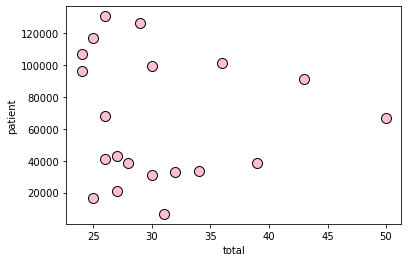

In [17]:
sns.scatterplot(temp['total'][:20],
             temp['patient'][:20],
             markers='o',
                linewidth=1,
                edgecolor='k',
                color='pink',
                s=100
             )

In [18]:
chart=alt.layer(data=temp[:10])
chart+=alt.Chart().mark_line().encode(
alt.X('total:Q',title='Number of Visits'),
alt.Y('patient:N',title='Patient Id'),
    
    detail='patient:N'
).properties(title='Most Visited Patnents',
            width=550,
            height=300)
chart+=alt.Chart().mark_point(color='royalblue',
                        size=100,
                              opacity=1,
                              filled=True
                             ).encode(
alt.X('total:Q'),
    alt.Y('patient:N'),
    tooltip=[alt.Tooltip('patient:Q'),
            alt.Tooltip('total:Q')]
)

chart

alt.LayerChart(...)

In [33]:
base=alt.Chart(temp.sample(5000))
bar=base.mark_bar(color='royalblue').encode(
    x=alt.X('total',title='Number of Visits'),
    y=alt.Y('count()',title='Number of patients'),
    tooltip=[alt.Tooltip('total:N'),alt.Tooltip('count():Q')]

).properties(
width=600, height=400,
title='Patients visiting to hosptail often with number of times')

bar

alt.Chart(...)